In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import pickle

In [2]:
df = pd.read_csv("large_house_price_dataset.csv")

In [3]:
df

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562
...,...,...,...,...,...,...,...
4995,3300,2,2,2,2,26,20789932
4996,771,2,4,3,1,0,6675496
4997,2322,5,4,3,2,6,17099165
4998,3485,2,2,1,0,21,21569046


In [4]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,Parking,Age,Price
0,3674,3,1,2,1,28,22674207
1,1360,2,2,3,2,20,8910116
2,1794,1,1,2,0,29,10412863
3,1630,1,4,3,2,7,11906611
4,1595,3,4,2,0,13,10903562


In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Area       5000 non-null   int64
 1   Bedrooms   5000 non-null   int64
 2   Bathrooms  5000 non-null   int64
 3   Floors     5000 non-null   int64
 4   Parking    5000 non-null   int64
 5   Age        5000 non-null   int64
 6   Price      5000 non-null   int64
dtypes: int64(7)
memory usage: 273.6 KB


In [7]:
df.isnull().sum()

Area         0
Bedrooms     0
Bathrooms    0
Floors       0
Parking      0
Age          0
Price        0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates(inplace=True)

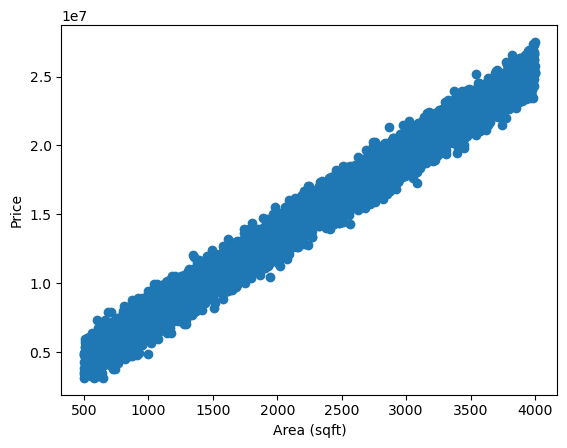

In [10]:
plt.scatter(df['Area'], df['Price'])
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.show()

In [11]:
x = df[['Area', 'Bedrooms','Bathrooms','Floors','Parking','Age']]
y = df['Price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [13]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [15]:
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test R2 :", r2_score(y_test, y_test_pred))

Train R2: 0.997723882726607
Test R2 : 0.9977531424848898


In [16]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)

MAE : 246078.8163888873
MSE : 80940652032.0376
RMSE: 284500.7065580639


In [17]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

ridge_pred = ridge.predict(x_test)

print("Ridge R2:", r2_score(y_test, ridge_pred))

Ridge R2: 0.9977530845924982


In [18]:
x_train.shape

(4000, 6)

In [19]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

lasso_pred = lasso.predict(x_test)

print("Lasso R2:", r2_score(y_test, lasso_pred))

Lasso R2: 0.9977531423822672


In [20]:
models = {
    "Linear": r2_score(y_test, y_test_pred),
    "Ridge": r2_score(y_test, ridge_pred),
    "Lasso": r2_score(y_test, lasso_pred)
}

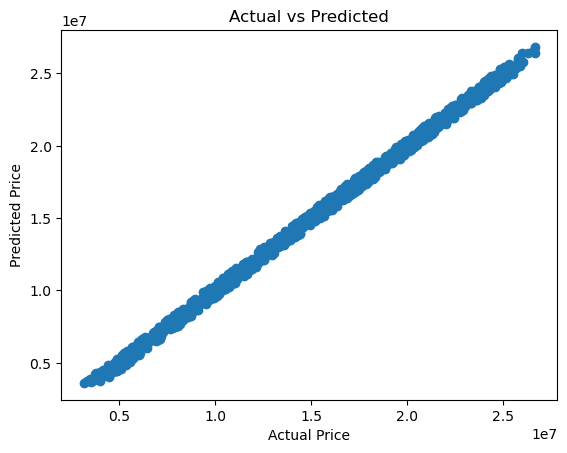

In [21]:
plt.scatter(y_test,y_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [22]:
with open("model.pkl", "wb") as file:
    pickle.dump(ridge, file)
print("Model Saved Successfully")

Model Saved Successfully
